In [ ]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
import tensorflow as tf
from tensorflow import keras
import cv2 
import os
import pickle
import collections
import seaborn as sns
from sklearn import model_selection
import re
from mlxtend.evaluate import bias_variance_decomp
import sys

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/lfw_attributes.csv', sep=",")

In [ ]:
data

,person,imagenum,Male,Asian,White,Black,Baby,Child,Youth,Middle Aged,Senior,Black Hair,Blond Hair,Brown Hair,Bald,No Eyewear,Eyeglasses,Sunglasses,Mustache,Smiling,Frowning,Chubby,Blurry,Harsh Lighting,Flash,Soft Lighting,Outdoor,Curly Hair,Wavy Hair,Straight Hair,Receding Hairline,Bangs,Sideburns,Fully Visible Forehead,Partially Visible Forehead,Obstructed Forehead,Bushy Eyebrows,Arched Eyebrows,Narrow Eyes,Eyes Open,Big Nose,Pointy Nose,Big Lips,Mouth Closed,Mouth Slightly Open,Mouth Wide Open,Teeth Not Visible,No Beard,Goatee,Round Jaw,Double Chin,Wearing Hat,Oval Face,Square Face,Round Face,Color Photo,Posed Photo,Attractive Man,Attractive Woman,Indian,Gray Hair,Bags Under Eyes,Heavy Makeup,Rosy Cheeks,Shiny Skin,Pale Skin,5 o' Clock Shadow,Strong Nose-Mouth Lines,Wearing Lipstick,Flushed Face,High Cheekbones,Brown Eyes,Wearing Earrings,Wearing Necktie,Wearing Necklace
0,Aaron Eckhart,1,1.568346,-1.889043,1.737203,-0.929729,-1.471799,-0.195580,-0.835609,-0.351468,-1.012533,-0.719593,-0.632401,0.464839,-0.973528,1.565186,-1.296704,-1.542719,-0.684671,-0.864990,0.766886,-0.218952,-1.655665,-0.787044,-0.599665,0.458519,0.189760,0.851555,-0.385720,-0.497719,-0.161149,-0.257514,-0.088839,0.455469,-0.839211,-0.022948,-0.922568,-0.114539,1.461222,1.758481,0.068894,1.267860,-1.120244,0.917617,-1.307957,-1.500413,1.029221,0.832363,-0.498657,0.251365,-0.705281,-0.515715,0.374239,-0.168675,-0.614143,3.097703,1.523858,0.779278,-0.071454,-1.246483,-0.769283,-0.725597,-1.820610,-2.072977,-0.960759,0.361738,1.166118,-1.164916,-1.139990,-2.371746,-1.299932,-0.414682,-1.144902,0.694007,-0.826609
1,Aaron Guiel,1,0.169851,-0.982408,0.422709,-1.282184,-1.360060,-0.867002,-0.452293,-0.197521,-0.956073,-0.802107,-0.736883,0.294554,-1.277647,0.954771,-0.990992,-1.167359,-0.835146,0.798544,-0.971679,0.342826,-1.322562,0.962937,-1.199363,-0.157307,0.443224,-0.002882,-0.021158,-0.226563,-0.081039,-0.827202,-0.106624,1.227594,-0.812223,-1.241258,0.096272,-0.404544,0.325919,0.474452,1.135359,0.058725,0.611176,-1.172510,0.428512,-0.874235,-1.191565,0.192359,-0.204166,0.342347,0.239512,-1.474690,0.236057,-0.565208,-0.712542,2.997076,-0.273306,-0.187722,-0.604608,-1.321701,-0.938559,0.494294,-0.659043,-1.143747,-0.775722,-0.832036,-0.397680,0.874160,-0.945431,-0.268649,-0.006244,-0.030406,-0.480128,0.666760,-0.496559
2,Aaron Patterson,1,0.997749,-1.364195,-0.157377,-0.756447,-1.891825,-0.871526,-0.862893,0.031445,-1.341523,-0.090037,-1.200725,-0.332460,-0.537006,1.298364,-1.498471,-1.285823,1.141742,0.172817,0.106412,-0.788843,0.349295,-1.643716,0.454287,1.189458,-0.688414,-0.590574,-0.266673,0.467224,0.567348,-1.719101,0.124667,1.602741,-0.659399,-1.753762,1.204473,0.022188,-1.135443,1.702857,-0.422144,0.587859,0.414363,0.344447,-1.260451,-0.577746,0.405567,-1.916545,0.921260,0.247437,-0.428451,-0.772273,0.370673,-0.509596,-0.768482,1.706897,0.126524,-0.497001,-0.393042,-0.178307,-1.180227,-0.596914,-1.805382,-0.951643,-0.838087,1.549743,1.884745,-0.999765,-1.359858,-1.912108,-1.095634,0.915126,-0.572332,0.144262,-0.841231
3,Aaron Peirsol,1,1.122719,-1.997799,1.916144,-2.514214,-2.580071,-1.404239,0.057551,0.000196,-1.273512,-1.431462,-0.070519,-0.339239,-2.004149,0.665695,-0.775940,-1.471629,-1.179080,0.563327,-0.664429,-1.407928,0.435594,-0.589988,-1.603498,1.170741,0.760103,0.211498,-0.516180,-1.331146,0.202840,0.149645,-0.046430,0.640885,-0.107616,-0.831271,-0.827005,-0.588725,0.429255,1.587664,0.499086,-0.056869,-0.866643,-0.959689,0.350730,-1.335354,-0.427890,0.826817,-0.256779,0.149751,-1.201531,-1.083917,0.255363,-0.650423,-0.506293,1.101592,0.640783,1.575028,-0.484397,-1.559682,-1.437124,0.379363,-0.648233,-2.257352,-1.075613,0.567822,-0.176089,1.108125,-1.600944,-3.264613,0.813418,0.308631,-0.848693,0.475941,-0.447025
4,Aaron Peirsol,2,1.078214,-2.008098,1.676211,-2.278056,-2.651845,-1.348408,0.649089,0.017656,-1.889111,-1.857213,-0.568057,0.840375,-1.981269,1.666710,-0.910723,-1.993509,-0.871335,0.507786,-0.488947,-0.886490,-0.990132,-0.7508

In [ ]:
np.mean(data['Eyeglasses'])

-0.7573992278051415

In [ ]:
data_eyeg_sung = data[(data['Eyeglasses'] > 1) | (data['Sunglasses'] > 1)]

In [ ]:
data_eyeg_sung

,person,imagenum,Male,Asian,White,Black,Baby,Child,Youth,Middle Aged,Senior,Black Hair,Blond Hair,Brown Hair,Bald,No Eyewear,Eyeglasses,Sunglasses,Mustache,Smiling,Frowning,Chubby,Blurry,Harsh Lighting,Flash,Soft Lighting,Outdoor,Curly Hair,Wavy Hair,Straight Hair,Receding Hairline,Bangs,Sideburns,Fully Visible Forehead,Partially Visible Forehead,Obstructed Forehead,Bushy Eyebrows,Arched Eyebrows,Narrow Eyes,Eyes Open,Big Nose,Pointy Nose,Big Lips,Mouth Closed,Mouth Slightly Open,Mouth Wide Open,Teeth Not Visible,No Beard,Goatee,Round Jaw,Double Chin,Wearing Hat,Oval Face,Square Face,Round Face,Color Photo,Posed Photo,Attractive Man,Attractive Woman,Indian,Gray Hair,Bags Under Eyes,Heavy Makeup,Rosy Cheeks,Shiny Skin,Pale Skin,5 o' Clock Shadow,Strong Nose-Mouth Lines,Wearing Lipstick,Flushed Face,High Cheekbones,Brown Eyes,Wearing Earrings,Wearing Necktie,Wearing Necklace
11,Abba Eban,1,0.891376,-0.438415,-0.091453,-1.738903,-1.024990,-1.464063,-0.720319,-0.660456,0.422967,-0.994338,-0.861802,-1.478486,0.044811,-1.839042,1.364000,-1.059565,-0.708427,1.042788,-0.985953,-0.015361,-0.870919,0.209452,-0.612433,0.002519,-0.026295,1.206707,-0.469633,-0.115299,1.500805,-1.173895,-0.150321,1.720873,-0.756571,-1.152290,-0.130448,0.306728,0.901029,0.281118,1.524275,-0.320513,-0.673076,-1.958219,-0.287539,0.606163,-1.210706,0.650360,-0.232447,0.209564,0.707926,-0.347586,-0.007994,-0.490397,-0.611137,3.166451,-0.500568,-0.935811,-1.144654,-1.314293,-0.054920,0.533673,-0.791892,1.872837,-0.610418,1.294854,-0.470484,0.806376,-1.021146,1.071033,0.008474,0.441745,-0.575209,0.428245,0.049420
65,Adam Herbert,1,1.560896,-0.682723,-0.144132,-0.248947,-2.184962,-1.594235,-1.261326,-0.192192,0.692476,-1.257894,-1.090903,-1.154971,-0.340501,-1.514334,1.657590,-1.244636,-0.246403,-0.969046,0.578671,-0.958364,-1.094435,1.003486,-0.933398,0.948395,0.527877,0.901251,0.004529,-0.081746,1.293035,-0.745005,-0.011995,1.017611,-0.646203,-0.123539,0.674154,-0.243821,1.892064,-1.576882,1.384288,-0.825420,-0.097030,0.832045,-0.798784,-1.329910,0.422535,0.110633,0.049014,0.037323,-0.372870,0.777285,0.126890,-0.325882,-1.052156,0.924792,-0.437172,-0.661319,-0.854476,-1.487670,0.040201,0.720240,-1.346520,-1.731096,-0.189376,-0.035970,0.978076,0.589878,-1.381297,-1.957178,-0.307275,1.306821,-0.977601,0.765260,-0.774844
73,Adam Scott,1,0.939057,-0.400515,-0.314256,-2.017519,-1.413213,-0.065480,-0.443729,-0.645220,-0.145437,-0.240641,-0.801750,-0.409412,-1.244435,-1.717000,1.060317,0.205631,-0.501312,-0.535188,0.628871,0.095559,-0.444686,0.193616,-0.629217,1.976299,0.941200,-0.003921,-0.330776,-0.178620,-0.565615,-0.693062,-0.294695,-0.115016,-0.215002,0.011114,0.285445,-0.191124,1.953789,-0.679681,0.044523,0.051448,0.021563,0.112863,-1.278079,-0.700395,1.275996,-0.052012,-0.256948,0.247431,-0.324654,0.996876,0.497460,-0.708810,-0.190225,3.315389,-1.065664,-0.391809,-0.775118,-1.122167,-0.258704,0.079092,-0.407224,-1.195437,-1.157498,-6.088279,-0.053308,-0.374793,-0.741705,-1.364770,-0.664691,1.165037,-0.301658,-0.744314,-0.951048
89,Adrian Fernandez,1,0.687753,-0.214105,-0.105258,-1.803177,-1.515000,-1.027170,-0.388956,-0.176173,-0.712303,-0.475537,-0.470834,1.099451,-0.820231,-2.162317,1.724502,-1.039646,-0.848029,-0.901660,1.124450,-0.358546,0.055127,-0.953324,0.008874,0.912365,-1.112774,0.153361,-0.776390,-0.426180,-1.330266,-0.185862,0.011429,-1.845682,0.568008,-0.767672,0.396076,0.597855,0.131212,1.256821,-0.053697,0.579546,-0.672964,-1.336543,0.158949,-0.905985,-0.154458,1.075176,-0.348474,0.220709,-0.508185,-1.367511,0.169583,-0.501225,-0.861663,2.235177,0.290778,-1.073695,-1.222231,-1.451346,-1.383872,0.146192,-1.029256,-1.215802,-1.064587,-0.515558,-0.221251,-1.478853,-1.297759,-1.448235,-1.010419,0.343436,-0.318953,-0.541671,-0.767589
124,Ahmed Qureia,1,1.008981,-1.314750,1.523454,-2.116692,-2.125553,-1.221953,-1.230812,-0.425646,0.777009,-1.815105,-0.840239,-2.378599,0.355704,-1.363151,1.129481,-1.243512,-1.272315,0.111218,-0.288854,-0.347297,-0.106410,-

In [ ]:
X_images = []
X_filename = []
X_labels = []
folderpath = '/content/lfw/lfw/'
for imgfolder in os.listdir(folderpath):
  if os.path.isdir(folderpath + imgfolder + '/' +'.ipynb_checkpoints/'):
    os.rmdir(folderpath + imgfolder + '/' +'.ipynb_checkpoints/')
  ##print(imgfolder)
  for filename in os.listdir(folderpath + imgfolder):
    filename_1 = folderpath + imgfolder + '/' + filename
    img = cv2.imread(filename_1,0)
    if img is not None:
      img = cv2.resize(img, (100,100), interpolation = cv2.INTER_AREA)
      X_images.append(img)
      X_labels.append(imgfolder)
      X_filename.append(filename)
      
X_images = np.asarray(X_images)
X_labels = np.asarray(X_labels)
X_filename = np.asarray(X_filename)
X_images.shape

(13233, 100, 100)

In [ ]:
X_images_flt = X_images.reshape(X_images.shape[0], X_images.shape[1] * X_images.shape[2]) /255

In [ ]:
df_all_img = pd.DataFrame({"person":X_labels,"imagenum":X_filename,"images":list(X_images_flt)})

In [ ]:
for i in range(len(df_all_img)):
  df_all_img['imagenum'][i] = int(re.search(r'\d+', df_all_img['imagenum'][i]).group())
  df_all_img['person'][i] = df_all_img['person'][i].replace("_", " ")

In [ ]:
df_all_img

,person,imagenum,images
0,Vadim Strogalev,1,"[0.2901960784313726, 0.2901960784313726, 0.290..."
1,Tony Parker,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Tony Parker,2,"[0.37254901960784315, 0.3411764705882353, 0.34..."
3,Tyler Hamilton,2,"[0.8549019607843137, 0.8549019607843137, 0.827..."
4,Tyler Hamilton,1,"[0.40784313725490196, 0.39215686274509803, 0.3..."
...,...,...,...
13228,Elva Hsiao,1,"[0.49019607843137253, 0.3686274509803922, 0.37..."
13229,Kathryn Bigelow,2,"[0.30196078431372547, 0.3176470588235294, 0.34..."
13230,Kathryn Bigelow,1,"[0.5607843137254902, 0.41568627450980394, 0.21..."
13231,Harland Braun,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
df_final_eyeg_sung = df_all_img[df_all_img.set_index(['person','imagenum']).index.isin(data_eyeg_sung.set_index(['person','imagenum']).index)]

In [ ]:
df_final_eyeg_sung['labels'] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_img_wo_se= df_all_img[~(df_all_img.set_index(['person','imagenum']).index.isin(data_eyeg_sung.set_index(['person','imagenum']).index))]

In [ ]:
df_img_wo_se['labels'] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_img_65_perc = df_img_wo_se.append(df_final_eyeg_sung[0:546])

In [ ]:
df_img_65_perc


,person,imagenum,images,labels
0,Vadim Strogalev,1,"[0.2901960784313726, 0.2901960784313726, 0.290...",0
1,Tony Parker,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
2,Tony Parker,2,"[0.37254901960784315, 0.3411764705882353, 0.34...",0
3,Tyler Hamilton,2,"[0.8549019607843137, 0.8549019607843137, 0.827...",0
4,Tyler Hamilton,1,"[0.40784313725490196, 0.39215686274509803, 0.3...",0
...,...,...,...,...
8636,Rafeeuddin Ahmed,1,"[0.30196078431372547, 0.3058823529411765, 0.31...",1
8639,Alvaro Uribe,21,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
8641,Alvaro Uribe,17,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
8642,Alvaro Uribe,11,"[0.00392156862745098, 0.00392156862745098, 0.5...",1


In [ ]:
class_names = ['without glasses','glasses']

In [ ]:
images = np.array(list(df_img_65_perc["images"].values))
labels = np.array(list(df_img_65_perc["labels"].values))

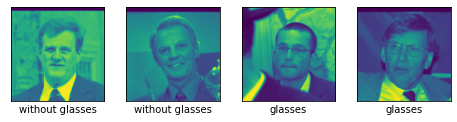

In [ ]:
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    two_d = (np.reshape(images[i+12392], (100, 100)) * 255).astype(np.uint8)
    plt.imshow(two_d)
    plt.xlabel(class_names[labels[i+12392]])
plt.show()

In [ ]:
# Prepare Classifier Training and Testing Data
print('\nPreparing Classifier Training and Testing Data...')
train_img, test_img, train_label, test_label = model_selection.train_test_split(images,labels,test_size=0.3)


Preparing Classifier Training and Testing Data...


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model = keras.Sequential([
    #keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', 
              loss='mse',#'sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.fit(train_img, train_label, epochs=500,callbacks=[callback])

Epoch 1/500
284/284 [==============================] - 3s 9ms/step - loss: 0.3352 - accuracy: 0.9091
Epoch 2/500
284/284 [==============================] - 3s 9ms/step - loss: 0.0505 - accuracy: 0.9589
Epoch 3/500
284/284 [==============================] - 3s 9ms/step - loss: 0.0551 - accuracy: 0.9574
Epoch 4/500
284/284 [==============================] - 3s 9ms/step - loss: 0.0425 - accuracy: 0.9571
Epoch 5/500
284/284 [==============================] - 3s 9ms/step - loss: 0.0428 - accuracy: 0.9564
Epoch 6/500
284/284 [==============================] - 3s 9ms/step - loss: 0.0398 - accuracy: 0.9593
Epoch 7/500
284/284 [==============================] - 3s 9ms/step - loss: 0.0400 - accuracy: 0.9580
Epoch 8/500
284/284 [==============================] - 3s 10ms/step - loss: 0.0440 - accuracy: 0.9544
Epoch 9/500
284/284 [==============================] - 3s 9ms/step - loss: 0.0397 - accuracy: 0.9599
Epoch 10/500
284/284 [==============================] - 3s 9ms/step - loss: 0.0421 - accur

In [ ]:
test_loss, test_acc = model.evaluate(test_img, test_label)

print('Test accuracy:', test_acc)

122/122 [==============================] - 0s 3ms/step - loss: 0.0395 - accuracy: 0.9588
Test accuracy: 0.9587841033935547


In [ ]:
pred_test_labels_prob = model.predict_classes(test_img)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
#pred_test_labels = np.where(pred_test_labels_prob>.1,1,0)

In [ ]:
con_mat = np.zeros((2,2))
for i in range(len(test_label)):
  con_mat[test_label[i]][pred_test_labels_prob[i]] += 1

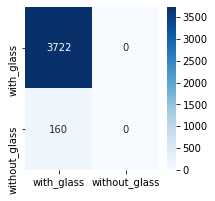

In [ ]:
  class_names = ['without_glass', 'with_glass']
  con_mat_df = pd.DataFrame(con_mat, index = [i for i in class_names],
                    columns = [i for i in class_names])
  plt.figure(figsize = (3,3))
  sns.heatmap(con_mat_df, annot=True, fmt='g',cmap='Blues')

In [ ]:
mse, bias, var = bias_variance_decomp(model, train_img, train_label, test_img, test_label, loss='mse', num_rounds=2, random_seed=1)

284/284 [==============================] - 3s 10ms/step - loss: 0.8593 - accuracy: 0.9265


In [ ]:
mse, bias, var

(0.04094620444773299, 0.04079124671315395, 0.00015495773457904042)

In [ ]:
ConfusionMatrix = collections.namedtuple('conf', ['tp','fp','tn','fn']) 
conf_mat = ConfusionMatrix(con_mat[0][0], con_mat[1][0], con_mat[1][1],con_mat[0][1] )

In [ ]:
disparate_impact =  (conf_mat.tn / (conf_mat.fp + conf_mat.tn)) /(conf_mat.tp / (conf_mat.tp + conf_mat.fn))
disparate_impact

0.0

### **New Evaluation Metric**

I have defined equal opportunity tpr rate which defines the correctly classiied ratio among each class. If tpr rate is equal(50%) in both the then we say that system is having minimum bias.

In [ ]:
Equal_Opr_Rate = abs((conf_mat.tn / (conf_mat.fp + conf_mat.tn))  - (conf_mat.tp / (conf_mat.tp + conf_mat.fn)))
Equal_Opr_Rate

1.0

### **Bias Mitigation**

### Part A: Data Method

In [ ]:
df_img_65_perc = df_img_wo_se.append(df_final_eyeg_sung)

In [ ]:
df_img_65_perc


,person,imagenum,images,labels
0,Vadim Strogalev,1,"[0.2901960784313726, 0.2901960784313726, 0.290...",0
1,Tony Parker,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
2,Tony Parker,2,"[0.37254901960784315, 0.3411764705882353, 0.34...",0
3,Tyler Hamilton,2,"[0.8549019607843137, 0.8549019607843137, 0.827...",0
4,Tyler Hamilton,1,"[0.40784313725490196, 0.39215686274509803, 0.3...",0
...,...,...,...,...
13066,Suh Young-hoon,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
13116,Jean-David Levitte,8,"[0.23137254901960785, 0.23137254901960785, 0.2...",1
13145,Richard Gere,3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
13165,Jimmy Jimenez,1,"[0.8549019607843137, 0.8509803921568627, 0.858...",1


In [ ]:
class_names = ['without glasses','glasses']

In [ ]:
images = np.array(list(df_img_65_perc["images"].values))
labels = np.array(list(df_img_65_perc["labels"].values))

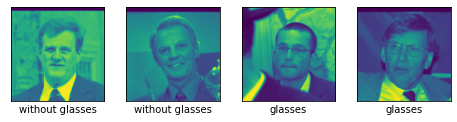

In [ ]:
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    two_d = (np.reshape(images[i+12392], (100, 100)) * 255).astype(np.uint8)
    plt.imshow(two_d)
    plt.xlabel(class_names[labels[i+12392]])
plt.show()

In [ ]:
# Prepare Classifier Training and Testing Data
print('\nPreparing Classifier Training and Testing Data...')
train_img, test_img, train_label, test_label = model_selection.train_test_split(images,labels,test_size=0.3)


Preparing Classifier Training and Testing Data...


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model = keras.Sequential([
    #keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', 
              loss='mse',#'sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.fit(train_img, train_label, epochs=500,callbacks=[callback])

Epoch 1/500
290/290 [==============================] - 3s 9ms/step - loss: 0.4364 - accuracy: 0.8966
Epoch 2/500
290/290 [==============================] - 3s 10ms/step - loss: 0.0707 - accuracy: 0.9330
Epoch 3/500
290/290 [==============================] - 3s 9ms/step - loss: 0.0656 - accuracy: 0.9354
Epoch 4/500
290/290 [==============================] - 3s 9ms/step - loss: 0.0655 - accuracy: 0.9303
Epoch 5/500
290/290 [==============================] - 3s 9ms/step - loss: 0.0616 - accuracy: 0.9338
Epoch 6/500
290/290 [==============================] - 3s 10ms/step - loss: 0.0651 - accuracy: 0.9311
Epoch 7/500
290/290 [==============================] - 3s 10ms/step - loss: 0.0590 - accuracy: 0.9360
Epoch 8/500
290/290 [==============================] - 3s 10ms/step - loss: 0.0605 - accuracy: 0.9337
Epoch 9/500
290/290 [==============================] - 3s 9ms/step - loss: 0.0647 - accuracy: 0.9302
Epoch 10/500
290/290 [==============================] - 3s 10ms/step - loss: 0.0586 - a

In [ ]:
test_loss, test_acc = model.evaluate(test_img, test_label)

print('Test accuracy:', test_acc)

125/125 [==============================] - 0s 3ms/step - loss: 0.0550 - accuracy: 0.9428
Test accuracy: 0.9428211450576782


In [ ]:
pred_test_labels_prob = model.predict_classes(test_img)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
# [i for i,val in enumerate(list(test_label)) if val==1]
# pred_test_labels = np.where(pred_test_labels_prob>.1,1,0)

In [ ]:
con_mat = np.zeros((2,2))
for i in range(len(test_label)):
  con_mat[test_label[i]][pred_test_labels_prob[i]] += 1

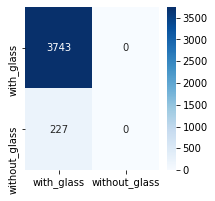

In [ ]:
class_names = ['with_glass', 'without_glass']
con_mat_df = pd.DataFrame(con_mat, index = [i for i in class_names],
                  columns = [i for i in class_names])
plt.figure(figsize = (3,3))
sns.heatmap(con_mat_df, annot=True, fmt='g',cmap='Blues')

In [ ]:
mse, bias, var = bias_variance_decomp(model, train_img, train_label, test_img, test_label, loss='mse', num_rounds=2, random_seed=1)

290/290 [==============================] - 3s 9ms/step - loss: 0.3970 - accuracy: 0.8978


In [ ]:
mse, bias, var

(0.05494612086570262, 0.05401798216975117, 0.0009281386959514491)

In [ ]:
ConfusionMatrix = collections.namedtuple('conf', ['tp','fp','tn','fn']) 
conf_mat = ConfusionMatrix(con_mat[0][0], con_mat[1][0], con_mat[0][1], con_mat[1][1])

In [ ]:
disparate_impact =  (conf_mat.tn / (conf_mat.fp + conf_mat.tn)) /(conf_mat.tp / (conf_mat.tp + conf_mat.fn))
disparate_impact

0.0

In [ ]:
Equal_Opr_Rate = abs((conf_mat.tn / (conf_mat.fp + conf_mat.tn))  - (conf_mat.tp / (conf_mat.tp + conf_mat.fn)))
Equal_Opr_Rate

1.0

### **Part B: Algorithmic Method**

In [ ]:
# Prepare Classifier Training and Testing Data
print('\nPreparing Classifier Training and Testing Data...')
train_img, test_img, train_label, test_label = model_selection.train_test_split(images,labels,test_size=0.3)


Preparing Classifier Training and Testing Data...


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model = keras.Sequential([
    #keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model.compile(optimizer='adam', 
              loss='binary_crossentropy',#'sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.fit(train_img, train_label, epochs=500,callbacks=[callback])

Epoch 1/500
290/290 [==============================] - 3s 9ms/step - loss: 0.2685 - accuracy: 0.9344
Epoch 2/500
290/290 [==============================] - 3s 9ms/step - loss: 0.2479 - accuracy: 0.9345
Epoch 3/500
290/290 [==============================] - 3s 9ms/step - loss: 0.2315 - accuracy: 0.9377
Epoch 4/500
290/290 [==============================] - 3s 9ms/step - loss: 0.2406 - accuracy: 0.9332
Epoch 5/500
290/290 [==============================] - 3s 9ms/step - loss: 0.2301 - accuracy: 0.9370
Epoch 6/500
290/290 [==============================] - 3s 10ms/step - loss: 0.2219 - accuracy: 0.9350
Epoch 7/500
290/290 [==============================] - 3s 9ms/step - loss: 0.2408 - accuracy: 0.9280
Epoch 8/500
290/290 [==============================] - 3s 10ms/step - loss: 0.1971 - accuracy: 0.9429
Epoch 9/500
290/290 [==============================] - 3s 9ms/step - loss: 0.2021 - accuracy: 0.9405
Epoch 10/500
290/290 [==============================] - 3s 9ms/step - loss: 0.2020 - accu

In [ ]:
test_loss, test_acc = model.evaluate(test_img, test_label)

print('Test accuracy:', test_acc)

125/125 [==============================] - 1s 3ms/step - loss: 0.2579 - accuracy: 0.9113
Test accuracy: 0.9113349914550781


In [ ]:
pred_test_labels_prob = model.predict_classes(test_img)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
# [i for i,val in enumerate(list(test_label)) if val==1]
# pred_test_labels = np.where(pred_test_labels_prob>.1,1,0)

In [ ]:
con_mat = np.zeros((2,2))
for i in range(len(test_label)):
  con_mat[test_label[i]][pred_test_labels_prob[i]] += 1

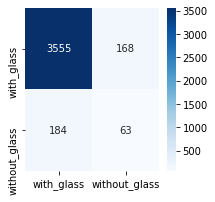

In [ ]:
class_names = ['with_glass', 'without_glass']
con_mat_df = pd.DataFrame(con_mat, index = [i for i in class_names],
                  columns = [i for i in class_names])
plt.figure(figsize = (3,3))
sns.heatmap(con_mat_df, annot=True, fmt='g',cmap='Blues')

In [ ]:
mse, bias, var = bias_variance_decomp(model, train_img, train_label, test_img, test_label, loss='mse', num_rounds=2, random_seed=1)

290/290 [==============================] - 3s 9ms/step - loss: 0.3752 - accuracy: 0.9237


In [ ]:
mse, bias, var

(0.059358127269153016, 0.05911346562248629, 0.00024466164666672057)

In [ ]:
ConfusionMatrix = collections.namedtuple('conf', ['tp','fp','tn','fn']) 
conf_mat = ConfusionMatrix(con_mat[0][0], con_mat[1][0], con_mat[0][1], con_mat[1][1])

In [ ]:
disparate_impact =  (conf_mat.tn / (conf_mat.fp + conf_mat.tn)) /(conf_mat.tp / (conf_mat.tp + conf_mat.fn))
disparate_impact

0.26711423153794905

In [ ]:
Equal_Opr_Rate = abs((conf_mat.tn / (conf_mat.fp + conf_mat.tn))  - (conf_mat.tp / (conf_mat.tp + conf_mat.fn)))
Equal_Opr_Rate

0.6998143719802823